# Michell Luiz Costalonga

# Exercícios - Módulo 12

### Modelos baseados em árvores

<br>

Ao longo do módulo, discutimos bastante as árvores de decisão, bem como ensemble de árvores, como Random Forest e algoritmos do tipo boosting.

Esses __ensembles acabam tendo muitos hiperparâmetros;__ escolhe-los de forma manual acaba sendo muito custoso e tedioso. 

Neste exercício, vamos discutir a respeito da metolodia __grid-search__, que otimiza essa busca de hiperparâmetros.

Considere o dataset abaixo (basta executar as células):

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Usado para tornar a ordem dos dados aleatória
from sklearn.utils import shuffle 

# Algorítmos de regressão
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Função para normalização e codificação dos dados, respectivamente
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Funções com métricas de performance
from sklearn.metrics import mean_squared_error, r2_score

# Função para realizar a validação cruzada e separação dos dados
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Datasets
from sklearn.datasets import load_diabetes

# Contar tempo
import time

# ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
#problema de regressão

X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(331, 10) (111, 10) (331,) (111,)


Imagine que queremos testar - usando cross-validation - várias instâncias de Random Forests: com 10 árvores, com 100 árvores, com 1000 árvores, com profundidade máxima 1, 5, 10. 

Como podemos proceder? O código abaixo exemplifica um jeito:

In [3]:


for n_est in [10,100,100]:
    for prof in [1,5,10]:
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=prof)
        cvres = cross_val_score(estimator=rf, X = Xtrain, y = ytrain, cv = 3, scoring='r2')
        print("estimators: ", n_est, " prof: ", prof, " | R2 mean / std: ", cvres.mean(), ' / ', cvres.std())

estimators:  10  prof:  1  | R2 mean / std:  0.34852765751092557  /  0.03265951438722261
estimators:  10  prof:  5  | R2 mean / std:  0.39964191304965196  /  0.06289241406662849
estimators:  10  prof:  10  | R2 mean / std:  0.406573775343376  /  0.014109384844909627
estimators:  100  prof:  1  | R2 mean / std:  0.3330142259255648  /  0.039300465798423265
estimators:  100  prof:  5  | R2 mean / std:  0.43548449693987584  /  0.035745194391947
estimators:  100  prof:  10  | R2 mean / std:  0.422364352464796  /  0.03561323580405732
estimators:  100  prof:  1  | R2 mean / std:  0.33878980904360373  /  0.03373092237498488
estimators:  100  prof:  5  | R2 mean / std:  0.4247614487477402  /  0.037674855364625996
estimators:  100  prof:  10  | R2 mean / std:  0.41215427142739164  /  0.03113422662913163


Podemos, com algum trabalho, escolher o melhor modelo.

Se quisermos testar mais parâmetros, podemos aumentar nosso loop... mais isso vai ficando cada vez mais complicado.

A proposta do __grid-search__ é justamente fazer isso de forma mais automática!

Podemos importar a função GridSearchCV do módulo model_selection do sklearn e usá-la para isso. 
Na prática, precisamos definir um __estimador base__ para o grid. Além disso, precisamos definir um __dicionário de parâmetros__ a ser testado. Ainda, definiremos a quantidade de folds para cross-validation e qual a métrica de performance que queremos otimizar:

In [4]:
#definindo o estimador base
estimador_base = RandomForestRegressor()

#definindo o dicionario de parâmetros do modelo
params_RF = {"n_estimators":[10,500], "max_depth":[2,10]}

In [5]:
grid = GridSearchCV(estimator = estimador_base, 
                    param_grid = params_RF, 
                    scoring = 'r2', 
                    cv = 3)

grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 500]},
             scoring='r2')

In [6]:
#treinando os modelos no grid
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 500]},
             scoring='r2')

O objeto "grid", após o treinamento acima, conterá várias informações muito relevantes. 

__1- "best_params_":__ retorna os melhores parâmetros, de acordo com a métrica de performance avaliada na cross-validation;

__1- "best_score_":__ retorna o melhor score - métrica de performance - nos dados de validação;

__1- "best_estimator_":__ retorna o melhor modelo, já treinado;

__1- "cv_results_":__ retorna uma visão geral dos resultados.

In [7]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [8]:
grid.best_score_

0.4201875292947403

In [9]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=500)

In [10]:
grid.cv_results_

{'mean_fit_time': array([0.00933369, 0.41951966, 0.01300009, 0.59692502]),
 'std_fit_time': array([4.70471583e-04, 7.97620790e-03, 2.53317792e-06, 1.15937895e-02]),
 'mean_score_time': array([0.00099913, 0.02633389, 0.00100009, 0.029006  ]),
 'std_score_time': array([9.60274217e-07, 4.73853206e-04, 4.49566384e-07, 8.10803879e-04]),
 'param_max_depth': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 500, 10, 500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 500},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 500}],
 'split0_test_score': array([0.25917085, 0.34899806, 0.21880261, 0.36967816]),
 'split1_test_score': array([0.42366251, 0.44704195, 0.39642644, 0.44419832]),
 'split2_test_sc

__Exercício 1:__ Utilizando o dataset abaixo, faça um grid_search com KNN's, Random Forests e GradientBoostings e retorne o melhor modelo de cada tipo.

__Obs.:__ Lembre-se de fazer um pré-processamento nos dados!

In [11]:
#preco_mediano_das_casas é a variável target
df = pd.read_csv("preco_casas.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,proximidade_ao_mar
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


### Pré-processamento dos dados

Nesse passo, realizaremos o pré-processamento dos dados que será dividido em quatro partes:

i. Tratamento das variáveis nulas

ii. Codificação das variáveis categóricas

iii. Normalização das variáveis numéricas (exceto as variáveis dummy)

iv. Separação dos conjunto de dados em dados de treino e dados de teste

#### i. Tratamento das variáveis nulas

In [12]:
# Porcentagem de dados nulos separados por categorias
print('Porcentagem de dados nulos por categoria:')
round((df.isnull().sum()/df.shape[0])*100, 3)

Porcentagem de dados nulos por categoria:


longitude                  0.000
latitude                   0.000
idade_mediana_das_casas    0.000
total_comodos              0.000
total_quartos              1.003
populacao                  0.000
familias                   0.000
salario_mediano            0.000
preco_mediano_das_casas    0.000
proximidade_ao_mar         0.000
dtype: float64

Antes de realizar o tratamento, iremos verificar como a variável é dependente da localidade. Para isso, faremos um gráfico de dispersão entre as variáveis longitude e latitude e iremos inserir a variável '*total_quartos*' como cor. As localidades em que aparecem pontos vermelhos são as regiões com o maior número de quartos, enquanto as regiões em azul indicam localidades com os menores números de quartos no total.

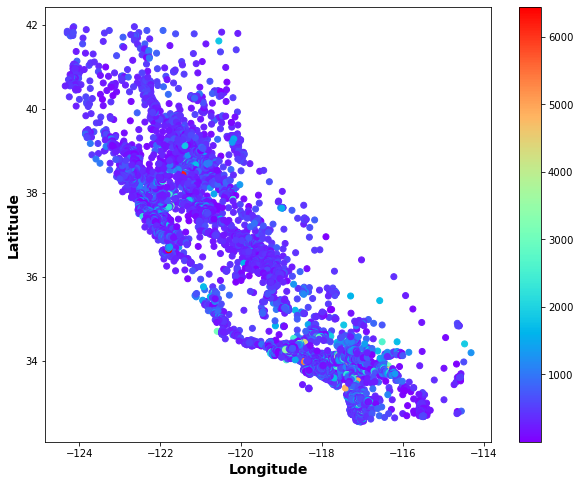

In [13]:
# Criando gráfico de dispersão entre a posição geográfica (longitude x latitude)
# com informação do valor da variável 'total_bedrooms' (barra de cor)
plt.figure(figsize=[10,8])
plt.scatter(df['longitude'], df['latitude'], c=df['total_quartos'], cmap=plt.cm.rainbow)
plt.colorbar()
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.show()

A partir do gráfico, conseguimos verificar que a maior parte dos dados apresentam um valor para a variável '*total_quartos*' menor que 1000. Com isso em mente, vemos que a localidade não influencia no número de quartos e preencheremos os valores nulos com a média da variável.

In [14]:
media_total_bedrooms = round(df['total_quartos'].mean(),0)
print('A média de "total_quartos" é: %d e todos os valores nulos foram preenchidos.' %(media_total_bedrooms))

df.total_quartos.fillna(media_total_bedrooms, inplace=True)

A média de "total_quartos" é: 538 e todos os valores nulos foram preenchidos.


#### One Hot Encoder: Codificação de variáveis categóricas

In [15]:
# Instanciando a função OneHotEncoder
ohe = OneHotEncoder()

# Retorna a variável categórica codificada
var = ohe.fit_transform(df[['proximidade_ao_mar']]).toarray()

# Retorna o nome das colunas
nome_col = ohe.categories_[0]

# Removendo a coluna da variável categórica, a opção axis='1' é usada para se referir a coluna e a opção inplace=True
#indica que a informação será salva na variável original, ou seja, na própria variável df.
df.drop('proximidade_ao_mar', axis=1, inplace=True)

# Guardaremos o nome das colunas do dataframe acima e das categorias em uma lista
nome_colunas = []
for item in df.columns:
    nome_colunas.append(item)

for item in nome_col:
    nome_colunas.append(item)
    
# Criando um dataframe com as variáveis numéricas e as variáveis codificadas
df = pd.DataFrame(np.c_[df, var])

# Renomeando as colunas
df.columns = nome_colunas

# Imprimindo a nova tabela
df.head()

,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,<1H OCEANO,ILHA,INTERIOR,PERTO DA BAÍA,PERTO OCEANO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


#### Normalização das variáveis numéricas, com exceção das variáveis dummies

In [16]:
# Guardando o nome das colunas que serão normalizadas
nome_col_norm = []

for item in df.columns:
    if (item != 'preco_mediano_das_casas'):
        nome_col_norm.append(item)
    else:
        break

# Instanciando a função StandardScaler
ss = StandardScaler()

# Normalizando as variáveis
variaveis_normalizadas = ss.fit_transform(df[nome_col_norm])

# Criando uma cópia do dataframe original
df_norm = df.copy()

# Inserindo os valores normalizados no dataframe
df_norm = pd.DataFrame(np.c_[variaveis_normalizadas, df.preco_mediano_das_casas.values, var])
df_norm.columns = nome_colunas

# Imprimindo as primeiro cinco linhas do dataframe normalizado
df_norm.head()

,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,<1H OCEANO,ILHA,INTERIOR,PERTO DA BAÍA,PERTO OCEANO
0,-1.327835,1.052548,0.982143,-0.804819,-0.975231,-0.974429,-0.977033,2.344766,452600.0,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355085,0.861439,1.669961,2.332238,358500.0,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829735,-0.820777,-0.843637,1.782699,352100.0,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722402,-0.766028,-0.733781,0.932968,341300.0,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615070,-0.759847,-0.629157,-0.012881,342200.0,0.0,0.0,0.0,1.0,0.0


#### Separação do conjunto de dados em dados de treino e dados de teste

Nesse caso, usaremos a função train_test_split da biblioteca scikit-learn.

In [17]:
dftrain, dftest = train_test_split(df_norm, test_size = 0.25, random_state = 0)
dftrain.shape, dftest.shape

((15480, 14), (5160, 14))

Por último, separaremos as variáveis independentes, das variável dependente (target), usando a função separarVar.

In [18]:
# Função para separar as variáveis independentes da variável dependente.
def separarVar(df_): # DataFrame de entrada
    
    verificador = True
    
    # Loop para separar as variáveis independentes da variável dependente
    for item in df_.columns:
        
        if (verificador):
            
            X = df_[item].values.reshape(-1,1)
            verificador = False
            
        else:
            
            if (item != 'preco_mediano_das_casas'):
                X = np.c_[X, df_[item].values.reshape(-1,1)]
                
            else:
                Y = df_[item].values.reshape(-1,1)
            
    return X, Y # Dados de saída

Xtrain, ytrain = separarVar(dftrain)
Xtest, ytest = separarVar(dftest)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((15480, 13), (15480, 1), (5160, 13), (5160, 1))

Com as variáveis separadas, podemos agora implementar um loop para encontrar a melhor combinação de parâmetros para os modelos KNNs, RandomForests e GradientBoostings.

#### Gradient Boosting Regressor: Documentação

Abaixo vemos a documentação da função GradientBoostingRegressor, assim como os valores padrões para os parâmetros de configuração. Vemos que há alta relação entre o __learning_rate__ e __n_estimators__. Além disso, é informado também que __max_depth__ deve ser alterado de acordo com os parâmetros configurados. Sendo assim, consideraremos esses três parâmetros ao instanciar a função GradientBoostingRegressor.

GradientBoostingRegressor(
    *,
    loss='ls',
    __learning_rate__=0.1,
    __n_estimators__=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

#### Parâmetros

loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    Loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

__learning_rate__ : float, default=0.1
    Learning rate shrinks the contribution of each tree by 'learning_rate'.
    __There is a trade-off between learning_rate and n_estimators__.

__n_estimators__ : int, default=100
    The number of boosting stages to perform. Gradient boosting
    is fairly robust to over-fitting __so a large number usually
    results in better performance.__

subsample : float, default=1.0
    The fraction of samples to be used for fitting the individual base
    learners. If smaller than 1.0 this results in Stochastic Gradient
    Boosting. `subsample` interacts with the parameter `n_estimators`.
    Choosing `subsample < 1.0` leads to a reduction of variance
    and an increase in bias.

criterion : {'friedman_mse', 'mse', 'mae'}, default='friedman_mse'
    The function to measure the quality of a split. Supported criteria
    are "friedman_mse" for the mean squared error with improvement
    score by Friedman, "mse" for mean squared error, and "mae" for
    the mean absolute error. The default value of "friedman_mse" is
    generally the best as it can provide a better approximation in
    some cases.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least "min_samples_leaf" training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

__max_depth__ : int, default=3
    Maximum depth of the individual regression estimators. The maximum
    depth limits the number of nodes in the tree. Tune this parameter
    for best performance; __the best value depends on the interaction
    of the input variables.__

min_impurity_decrease : float, default=0.0
    __A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.__

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where "N" is the total number of samples, "N_t" is the number of
    samples at the current node, "N_t_L" is the number of samples in the
    left child, and "N_t_R" is the number of samples in the right child.

    "N", "N_t", "N_t_R" and "N_t_L" all refer to the weighted sum,
    if "sample_weight" is passed.

min_impurity_split : float, default=None
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

In [19]:
# Definindo os estimadores que serão testados

estimador_base = {'KNN' : KNeighborsRegressor(), 'RF' : RandomForestRegressor(), 'GB' : GradientBoostingRegressor()}

# Definindo o dicionario de parâmetros para cara estimador
params_KNN = {'n_neighbors' : [1, 3, 5, 7, 9, 15, 50, 100]}
params_RF = {'n_estimators' : [50, 100, 500, 1000], 'max_depth' : [3, 10, 50]}
params_GB = {'learning_rate' : [0.05, 0.1, 0.15], 'n_estimators' : [50, 500, 1000, 2000], 'max_depth' : [3, 5, 7]}

# Dicionario de parâmetros
params = {'KNN' : params_KNN, 'RF' : params_RF, 'GB' : params_GB}

In [20]:
# Início da contagem do tempo de execução
t0 = time.time()

# Loop

# Criando listas para armazenas as melhores combinações para os modelos
lista_nomes_modelos = []
lista_modelos_treinados = []
lista_parametros = []
lista_R2 = []

for item in list(params.keys()):
    
    lista_nomes_modelos.append(item)
    
    grid = GridSearchCV(estimator = estimador_base[item], 
                        param_grid = params[item], 
                        scoring = 'r2', 
                        cv = 5)
    
    grid.fit(Xtrain, ytrain)
    lista_modelos_treinados.append(grid.best_estimator_)
    lista_parametros.append(grid.best_params_)
    lista_R2.append(grid.best_score_)

# Valor máximo da métrica escolhida. No caso de R2, quanto mais próximo de 1, melhor o modelo se ajusta aos dados.
r2_max = np.max(lista_R2)

# Fim da contagem do tempo de execução
t1 = time.time()
dt = t1 - t0

print('Tempo de execução: %d segundos' %(dt), end='\n\n')

df_results = pd.DataFrame(np.c_[lista_nomes_modelos, lista_R2], columns = ['Modelos', 'R2 validação'])

index_max = df_results.index[df_results['R2 validação'] == str(r2_max)][0]

highlight = lambda x:['background: lightgreen' if x['R2 validação'] == str(r2_max) else '' for i in x]

df_results[:].style.apply(highlight, axis=1)

Tempo de execução: 5356 segundos



,Modelos,R2 validação
0,KNN,0.7253078080694272
1,RF,0.8162742541993682
2,GB,0.8337507804869132


Para os parâmetros testados em cada modelo, abaixo são mostrados os valores ótimos.

In [21]:
# Imprimindo as melhores configurações de cada modelo

for i in range(0, len(lista_nomes_modelos)):
    print('Modelo %s: ' %(lista_nomes_modelos[i]))
    print('Melhores parâmetros para o modelo:', end=' ')
    print(lista_parametros[i])
    print('R2 = %s' %(str(lista_R2[i])), end='\n\n')

Modelo KNN: 
Melhores parâmetros para o modelo: {'n_neighbors': 9}
R2 = 0.7253078080694272

Modelo RF: 
Melhores parâmetros para o modelo: {'max_depth': 50, 'n_estimators': 500}
R2 = 0.8162742541993682

Modelo GB: 
Melhores parâmetros para o modelo: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000}
R2 = 0.8337507804869132



__Exercício 2:__ Crie uma classe para comparar o grid_search dentre vários modelos distintos.
    
    
Essa classe, gridSearchAll(), já está pré-desenvolvida no código abaixo. O exercício consiste de __completar essa classe.__ Para isso, crie o métodos fit_all, que irá treinar, usando grid_search, todos os grids que tenham sido pré-construídos e inseridos na classe.
Ainda, a quantidade de folds para a validação cruzada no grid_search deve ser implementada no método construtor da classe, bem como qual a métrica de performance a ser avaliada. 
Finalmente, salve o melhor modelo de cada grid e tenha um método best_all_grid_models que retorna o melhor modelo dentre todos os grids.

In [22]:
class gridSearchAll():
    
    def __init__(self):
        
        self.grid_models = []
        self.best_grid_models = []
        self.lista_parametros = []
        self.lista_nomes = []
        self.lista_score = []
        self.scoring = 'r2'
        self.num_folds = 3
    
    def insert_model(self, estimator_base, param_grid, nome_modelo):
        
        self.grid_models.append([estimator_base, param_grid])
        self.lista_nomes.append(nome_modelo)
        
    def define_score(self, scoring):
        
        self.scoring = scoring
        
    def define_folds(self, num_folds):
        
        self.num_folds = num_folds
        
    def fit_all(self, X_data, y_data):
        
        # Início da contagem do tempo de execução
        t0 = time.time()
        
        for i in range(0, len(self.grid_models)):
            
            grid = GridSearchCV(estimator = self.grid_models[i][0], 
                                param_grid = self.grid_models[i][1], 
                                scoring = self.scoring, 
                                cv = self.num_folds)

            grid.fit(X_data, y_data)
            self.best_grid_models.append(grid.best_estimator_)
            self.lista_parametros.append(grid.best_params_)
            self.lista_score.append(grid.best_score_)
            
        # Fim da contagem do tempo de execução
        t1 = time.time()
        dt = t1 - t0
        
        self.score_max = np.max(self.lista_score)
        self.index_max = self.lista_score.index(self.score_max)
        
        print('Todos os modelos foram treinados.')
        print('Tempo de execução: %d segundos' %(dt), end='\n\n')
    
    def best_models_info(self):

        df_ = pd.DataFrame(np.c_[self.lista_nomes, self.best_grid_models, self.lista_score],
                          columns = ['Nome do modelo', 'Estimador', 'Score'])
        
        return df_

    def best_all_grid_models_info(self):
      
        print('Melhor modelo: %s' %(self.lista_nomes[self.index_max]))
        print('Estimador:', end='')
        print(self.best_grid_models[self.index_max])
        print('Parâmetros:', end='')
        print(self.lista_parametros[self.index_max])
        print('Score: %s' %str(r2_max))
        print('*' * 30)
        print('Número de folds usados para a validação cruzada: %d' %(self.num_folds))
    
    def best_all_grid_models(self):
        
        # Valor máximo da métrica escolhida. No caso de R2, quanto mais próximo de 1, melhor o modelo se ajusta aos dados.
        score_max = np.max(self.lista_score)
        index_max = self.lista_score.index(score_max)
        
        return self.best_grid_models[index_max]

#### Explicação da classe "gridSearchAll"

Primeiro, deve-se instanciar a classe. Ao fazer isso, serão criadas listas vazias para armazenar os melhores modelos, parâmetros e score. Assim como uma lista para armazenar os modelos em que serão realizados o GridSearch com a validação cruzada. Os parâmetros scoring e num_folds são configurados, por padrão, como 'r2' e '3', respectivamente. Pode-se alterar qual o scoring será avaliado, assim como o número de folds através das funções __define_score(scoring)__ e __define_folds(num_folds)__.

Com a classe instanciada, pode-se usar a função insert_model para inserir o modelo e os parâmetros do mesmo que serão testados. Para inserir o modelo, deve-se informar três parâmetros:

- estimator_base: Nome do estimador. Exemplos: KNeighborsRegressor(), RandomForestRegressor(), ...
- param_grid: Parâmetros que serão alterados e testados do modelo. Exemplos: KNN: 'n_neighbors' = [1, 3, 5]; Random Forest: 'n_estimators' : [500, 1000], 'max_depth' : [3, 5, 7]. __Importante:__ os parâmetros devem ser informados como um dicionário.
- nome_modelo: Nome do modelo. Deve ser informado como string. Exemplo: 'KNN', 'Random Forest', ...

Depois de configurar todos os parâmetros, você pode usar a função __fit_all(X_data, y_data)__ para treinar todos os modelos com os dados desejados. Após isso, pode-se obter um dataframe com o melhor resultado para cada modelo através da função __best_models_info()__ e obter as informações para o melhor modelo com a função __best_all_grid_models_info()__.

O melhor modelo treinado pode ser obtido pela função __best_all_grid_models__. Abaixo veremos o uso de cada uma dessas funções.

In [23]:
# Instanciando a classe
gd = gridSearchAll()

In [24]:
# Verificando os modelos inseridos.
#Quando instanciada, a classe não apresenta nenhum modelo inserido,
# por isso o retorno é uma lista vazia
gd.grid_models

[]

In [25]:
# Alterando o número de folds
gd.define_folds(5)

# Retornando o número de folds
gd.num_folds

5

Como usaremos o R$^2$ como métrica, não precisaremos usar a função "define_score". Mas a mesma poderia ser usada como mostrado abaixo:

gd.define_score('nome da metrica')

Onde 'nome da metrica' deve ser substituído por uma das opções abaixo.

__Regression__

- 'explained_variance': deve importar a biblioteca metrics.explained_variance_score

- 'max_error': deve importar a biblioteca metrics.max_error

- 'neg_mean_absolute_error': deve importar a biblioteca metrics.mean_absolute_error

- 'neg_mean_squared_error': deve importar a biblioteca metrics.mean_squared_error

- 'neg_root_mean_squared_error': deve importar a biblioteca metrics.mean_squared_error

- 'neg_mean_squared_log_error': deve importar a biblioteca metrics.mean_squared_log_error

- 'neg_median_absolute_error': deve importar a biblioteca metrics.median_absolute_error

- 'r2': deve importar a biblioteca metrics.r2_score

- 'neg_mean_poisson_deviance': deve importar a biblioteca metrics.mean_poisson_deviance

- 'neg_mean_gamma_deviance': deve importar a biblioteca metrics.mean_gamma_deviance

- 'neg_mean_absolute_percentage_error': deve importar a biblioteca metrics.mean_absolute_percentage_error

Deve-se levar em consideração que na classe criada, busca-se o valor máximo do score por padrão, pois considerei a métrica 'r2'. Caso 'neg_mean_squared_error' seja selecionado, deve-se alterar a classe para que busque o valor mínimo, e não máximo.

[Clique aqui para mais informações sobre as métricas](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [26]:
# Definindo os parâmetros dos modelos que serão testados
params_KNN = {'n_neighbors' : [1, 2, 10]}
params_RF = {'n_estimators' : [500, 1000], 'max_depth' : [3, 5, 7]}
params_GB = {'learning_rate' : [0.01, 0.05], 'n_estimators' : [1000, 2000], 'max_depth' : [3, 5, 7]}

In [27]:
# Inserindo o primeiro modelo
gd.insert_model(estimator_base = RandomForestRegressor(), param_grid = params_RF, nome_modelo = 'RF')

In [28]:
# Inserindo o segundo modelo
gd.insert_model(estimator_base = KNeighborsRegressor(), param_grid = params_KNN, nome_modelo = 'KNN')

In [29]:
# Inserindo o terceiro modelo
gd.insert_model(estimator_base = GradientBoostingRegressor(), param_grid = params_GB, nome_modelo = 'GB')

In [30]:
# Checando modelos inseridos até o momento
for item in gd.grid_models:
    print(item)

[RandomForestRegressor(), {'n_estimators': [500, 1000], 'max_depth': [3, 5, 7]}]
[KNeighborsRegressor(), {'n_neighbors': [1, 2, 10]}]
[GradientBoostingRegressor(), {'learning_rate': [0.01, 0.05], 'n_estimators': [1000, 2000], 'max_depth': [3, 5, 7]}]


In [31]:
# Ajustando os dados a todos os modelos inseridos
gd.fit_all(X_data = Xtrain, y_data = ytrain)

Todos os modelos foram treinados.
Tempo de execução: 3053 segundos



In [32]:
# Matriz com os melhores resultados levando em consideração a combinação de parâmetros pada cada um dos modelos testados.
gd.best_models_info()

,Nome do modelo,Estimador,Score
0,RF,"(DecisionTreeRegressor(max_depth=7, max_featur...",0.723814
1,KNN,KNeighborsRegressor(n_neighbors=10),0.725589
2,GB,([DecisionTreeRegressor(criterion='friedman_ms...,0.833925


In [33]:
# Informação sobre o melhor modelo
gd.best_all_grid_models_info()

Melhor modelo: GB
Estimador:GradientBoostingRegressor(learning_rate=0.05, max_depth=7, n_estimators=2000)
Parâmetros:{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 2000}
Score: 0.8337507804869132
******************************
Número de folds usados para a validação cruzada: 5


In [34]:
# Retornando o melhor modelo treinado.
gd.best_all_grid_models()

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, n_estimators=2000)

__Exercício 3:__ Usando a classe criada, analise novamente os modelos criados no exercício 1.

Com o modelo treinado, podemos aplicá-lo aos dados de teste do exercício 1.

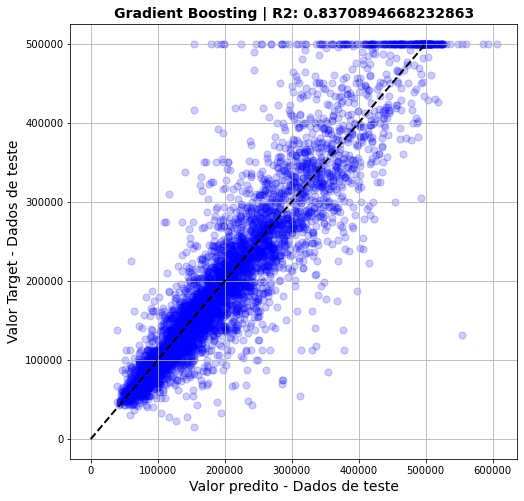

In [35]:
x = y = np.linspace(0,500000, 10)
y_pred = gd.best_all_grid_models().predict(Xtest)
r2 = r2_score(y_true = ytest, y_pred = y_pred)
        
# Criando um gráfico para avaliar o resultado
plt.figure(figsize=[8,8])
plt.title('Gradient Boosting' + ' | R2: ' + str(r2), fontsize = 14, fontweight = 'bold')
plt.scatter(gd.best_all_grid_models().predict(Xtest), ytest, alpha=0.2, s=50, c='blue')
plt.plot(x, y, lw=2, c ='black', ls='--')
plt.xlabel('Valor predito - Dados de teste', fontsize = 14)
plt.ylabel('Valor Target - Dados de teste', fontsize = 14)
plt.grid()
plt.show()

Ao aplicar o modelo treinado, selecionado pela classe "gridSearchAll", vemos que o valor de R$^2$ permanece muito próximo àquele da validação. Isso indica que o modelo se ajusta bem aos dados e não apresenta overfitting.

Ainda, Podemos obter cada um dos melhores modelos treinados a partir da função best_models_info() que retorna um dataframe com o nome do modelo, o modelo treinado (na coluna Estimador) e o valor de R$^2$ da validação.

In [36]:
# Modelo treinado com os melhores parâmetros (primeiro a ser inserido)
gd.best_models_info()['Estimador'][0]

RandomForestRegressor(max_depth=7, n_estimators=500)

In [37]:
# Modelo treinado com os melhores parâmetros (segundo a ser inserido)
gd.best_models_info()['Estimador'][1]

KNeighborsRegressor(n_neighbors=10)

In [38]:
# Modelo treinado com os melhores parâmetros (terceiro a ser inserido)
gd.best_models_info()['Estimador'][2]

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, n_estimators=2000)